In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
import string
from wordcloud import WordCloud

In [3]:
data = pd.read_excel('DataNLP.xlsx',usecols=[0,1,2])
data = data.fillna(' ')
data['Article'] = data['Title'] + ' ' + data['Summary']
data.drop_duplicates(subset='Article',inplace=True)

In [4]:
def text_preprocessing(text):
    text = re.sub(r'[^a-z\s]', '', str(text).lower().strip())
    text = word_tokenize(text)
    stop_words = stopwords.words('english')
    stop = ['u','us']
    stop_words = stop_words + stop
    text = [word for word in text if word not in stop_words]
    word_lem = WordNetLemmatizer()
    news_text = [word_lem.lemmatize(word,pos='v') for word in text]
    return news_text

In [5]:
data['Cleaned_article'] = data['Article'].apply(lambda x: text_preprocessing(x))

In [6]:
data.head(3)

,Title,Summary,Published On,Article,Cleaned_article
0,US home price growth slowed in October,"U.S. home price growth slowed in October, a li...",2018-12-26 14:17:00Z,US home price growth slowed in October U.S. ho...,"[home, price, growth, slow, october, home, pri..."
1,Trump lashes out at Fed — again: 'They're rais...,Trump has largely laid the blame for economic ...,2018-12-25 16:15:00Z,Trump lashes out at Fed — again: 'They're rais...,"[trump, lash, feed, theyre, raise, interest, r..."
2,"Shutdown won't stop key jobs report or CPI, bu...",The partial government shutdown will have some...,2018-12-26 16:42:00Z,"Shutdown won't stop key jobs report or CPI, bu...","[shutdown, wont, stop, key, job, report, cpi, ..."


In [7]:
words = data['Cleaned_article'].to_list()

In [8]:
import gensim
from gensim import corpora,models

In [9]:
dict_for_dtm = corpora.Dictionary(words)
dict_for_dtm

In [10]:
dtm = [dict_for_dtm.doc2bow(w) for w in words]
type(dtm)

list

In [11]:
len(dtm)

1217

In [12]:
tf_idf = models.TfidfModel(dtm)
tf_idf

In [13]:
doc_tf_idf = tf_idf[dtm]
type(doc_tf_idf)

gensim.interfaces.TransformedCorpus

In [14]:
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=dtm,id2word=dict_for_dtm,num_topics=5,passes=50,eval_every=None)

In [15]:
lda_model.print_topics()

[(0,
  '0.017*"say" + 0.013*"growth" + 0.013*"economy" + 0.013*"economic" + 0.010*"coronavirus" + 0.009*"rise" + 0.009*"year" + 0.009*"job" + 0.009*"quarter" + 0.008*"expect"'),
 (1,
  '0.028*"claim" + 0.022*"unemployment" + 0.019*"million" + 0.018*"expect" + 0.018*"week" + 0.016*"jobless" + 0.016*"coronavirus" + 0.016*"job" + 0.013*"report" + 0.013*"total"'),
 (2,
  '0.023*"price" + 0.021*"sales" + 0.017*"home" + 0.013*"rise" + 0.011*"biggest" + 0.010*"move" + 0.010*"month" + 0.009*"consumer" + 0.009*"retail" + 0.009*"expect"'),
 (3,
  '0.023*"rat" + 0.019*"say" + 0.019*"feed" + 0.015*"market" + 0.013*"mortgage" + 0.010*"cut" + 0.009*"interest" + 0.008*"rate" + 0.008*"coronavirus" + 0.008*"trade"'),
 (4,
  '0.028*"say" + 0.026*"trump" + 0.021*"trade" + 0.017*"feed" + 0.014*"china" + 0.012*"economy" + 0.010*"president" + 0.009*"bank" + 0.008*"tariff" + 0.007*"economic"')]

In [16]:
import pyLDAvis
import pyLDAvis.gensim_models

In [17]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model,dtm,dict_for_dtm)
vis

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.017985 -0.009033       1        1  24.061846
3      0.074404  0.039651       2        1  21.837762
4      0.187823  0.004636       3        1  19.086892
1     -0.112526 -0.173502       4        1  18.776433
2     -0.167685  0.138247       5        1  16.237068, topic_info=              Term        Freq       Total Category  logprob  loglift
53           claim  147.000000  147.000000  Default  30.0000  30.0000
180   unemployment  113.000000  113.000000  Default  29.0000  29.0000
32           trump  174.000000  174.000000  Default  28.0000  28.0000
10           price  111.000000  111.000000  Default  27.0000  27.0000
1256       million  100.000000  100.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
93             say   32.284862  441.677788   Topic5  -4.9273  -0.7981
248        percent   22.434449   53.626808   Topic5  -5.2913   0.9464
744       increase   22.925799   73.045412   Topic5  -5.2696   0.6591
500            may   23.835562  122.337934   Topic5  -5.2307   0.1823
228           gain   22.547071   66.027706   Topic5  -5.2863   0.7434

[358 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
183       1  0.162868  accord
183       2  0.086863  accord
183       3  0.108579  accord
183       4  0.282305  accord
183       5  0.347452  accord
...     ...       ...     ...
1160      2  0.903322   yield
1160      5  0.056458   yield
546       1  0.132645    zero
546       2  0.795870    zero
546       3  0.066323    zero

[644 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 2, 3])

In [18]:
lda_model.log_perplexity(dtm)

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-7.193536446243525

In [19]:
from gensim.models.coherencemodel import CoherenceModel

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
CoherenceModel(lda_model,texts=words,dictionary=dict_for_dtm,coherence='c_v').get_coherence()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.36680218204831744

In [21]:
coher_score = []
for k in range(1,10):
    LDAmodel = LDA(corpus=dtm,id2word=dict_for_dtm,num_topics=k,passes=50,eval_every=None)
    co_score = CoherenceModel(LDAmodel,texts=words,dictionary=dict_for_dtm,coherence='c_v').get_coherence()
    coher_score.append((k,co_score))

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
coher_score

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(1, 0.15722977208068428),
 (2, 0.3119369978696619),
 (3, 0.4735370575911215),
 (4, 0.31031563435577403),
 (5, 0.3577599960255652),
 (6, 0.40055795008904616),
 (7, 0.4224950914998543),
 (8, 0.3887448690653347),
 (9, 0.4134030146974365)]

In [23]:
x = []
y = []
for i in range(0,9):
    x.append(coher_score[i][0])
    y.append(coher_score[i][1])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


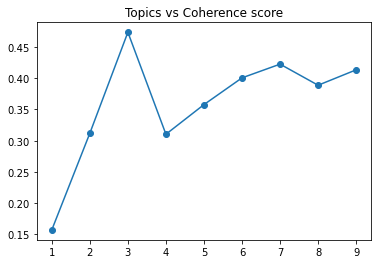

In [24]:
plt.plot(x,y)
plt.scatter(x,y)
plt.title('Topics vs Coherence score')
plt.show()

In [25]:
perplexity = []
for k in range(1,10):
    perplex_score = LDAmodel.log_perplexity(dtm)
    perplexity.append((k,perplex_score))

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
perplexity

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(1, -7.224034277008678),
 (2, -7.223972781237117),
 (3, -7.224011145855786),
 (4, -7.22400365242892),
 (5, -7.22398331612783),
 (6, -7.22398499675725),
 (7, -7.224012602129327),
 (8, -7.22398109469704),
 (9, -7.223987819484649)]

In [27]:
x_per = []
y_per = []
for i in range(0,9):
    x_per.append(perplexity[i][0])
    y_per.append(perplexity[i][1])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


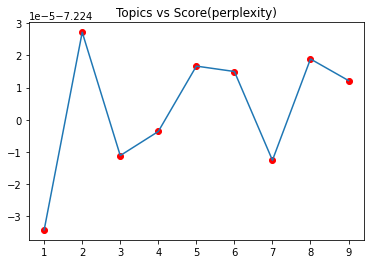

In [28]:
plt.plot(x_per,y_per)
plt.scatter(x_per,y_per,color='red')
plt.title('Topics vs Score(perplexity)')
plt.show()

## we can choose topics between 3 and 4

In [29]:
#lets take 3
optimal_ldamodel = LDA(corpus=dtm,id2word=dict_for_dtm,num_topics=3,passes=50,eval_every=None)
co_score = CoherenceModel(optimal_ldamodel,texts=words,dictionary=dict_for_dtm,coherence='c_v')
perplexity_score=optimal_ldamodel.log_perplexity(dtm)
coherence_score = co_score.get_coherence()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
print("The Coherence Score for Topic of 3 is {}".format(coherence_score))
print("The Perplexity Score for Topic of 3 is {}".format(perplexity_score))

The Coherence Score for Topic of 3 is 0.3699383266955791
The Perplexity Score for Topic of 3 is -7.181175692448984


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
optimal_ldamodel.print_topics()

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.014*"say" + 0.011*"consumer" + 0.010*"home" + 0.010*"trade" + 0.010*"rise" + 0.008*"market" + 0.008*"price" + 0.008*"economy" + 0.007*"coronavirus" + 0.006*"recession"'),
 (1,
  '0.018*"claim" + 0.016*"expect" + 0.014*"week" + 0.013*"unemployment" + 0.012*"million" + 0.010*"coronavirus" + 0.010*"job" + 0.010*"weekly" + 0.010*"jobless" + 0.009*"report"'),
 (2,
  '0.026*"say" + 0.020*"feed" + 0.015*"trump" + 0.013*"economy" + 0.011*"economic" + 0.010*"cut" + 0.010*"coronavirus" + 0.009*"rat" + 0.009*"federal" + 0.008*"president"')]

In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_ldamodel,corpus=dtm,dictionary=dict_for_dtm)
vis

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.130876  0.065288       1        1  37.454626
0     -0.018568 -0.108930       2        1  33.060054
1      0.149444  0.043642       3        1  29.485319, topic_info=              Term        Freq       Total Category  logprob  loglift
53           claim  144.000000  144.000000  Default  30.0000  30.0000
21            feed  237.000000  237.000000  Default  29.0000  29.0000
180   unemployment  112.000000  112.000000  Default  28.0000  28.0000
1256       million   99.000000   99.000000  Default  27.0000  27.0000
69            week  125.000000  125.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
500            may   46.276586  122.372227   Topic3  -5.1638   0.2488
133          trade   52.635115  193.577974   Topic3  -5.0351  -0.0810
447          house   42.937391   95.593113   Topic3  -5.2387   0.4209
93             say   54.321143  444.470082   Topic3  -5.0036  -0.8807
10           price   37.795396  111.835074   Topic3  -5.3663   0.1364

[224 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
184       1  0.965028   activity
669       3  0.926917        adp
50        1  0.229486  americans
50        2  0.061196  americans
50        3  0.703756  americans
...     ...       ...        ...
70        1  0.347943       year
70        2  0.364512       year
70        3  0.289953       year
1160      1  0.056821      yield
1160      2  0.965963      yield

[324 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [33]:
import pickle

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
modelname = 'model.pkl'
dictionaryname = 'dictionary.pkl'
pickle.dump(optimal_ldamodel,open(modelname,'wb'))
pickle.dump(dict_for_dtm,open(dictionaryname,'wb'))

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


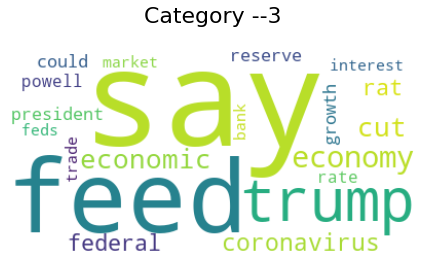

In [35]:
topic = 0 
while topic < 3:
    topic_words_freq = dict(optimal_ldamodel.show_topic(topic, topn=20))   
    #Word Cloud for topic using frequencies
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(topic_words_freq) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Category --"+str(topic+1)+"\n",fontsize='22')
    plt.tight_layout()
    plt.savefig("Category"+str(topic+1)+".png")
    topic += 1 